## Standard High Resolution Melt and L-DNA-based Melt Analysis
### Cutoff Calculations and Youden J Heat Map Analysis

#### Standard HRM

    Negative_Cutoff Positive_Cutoff Sensitivity Specificity  Youden_J
121            82.4            82.0         0.0         1.0  0.000000
122            82.4            82.1         0.0         1.0  0.000000
123            82.4            82.2         0.0         1.0  0.000000
124            82.4            82.3         0.0         1.0  0.000000
125            82.4            82.4         0.0         1.0  0.000000
126            82.4            82.5    0.666667    0.987654  0.654321
127            82.4            82.6         1.0    0.975309  0.975309
128            82.4            82.7         1.0    0.975309  0.975309
129            82.4            82.8         1.0    0.975309  0.975309
130            82.4            82.9         1.0    0.975309  0.975309
131            82.4            83.0         1.0    0.901235  0.901235
132            82.4            83.1         1.0    0.901235  0.901235
133            82.4            83.2         1.0    0.901235  0.901235
134            82.4 

/Users/daltonjaynelson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


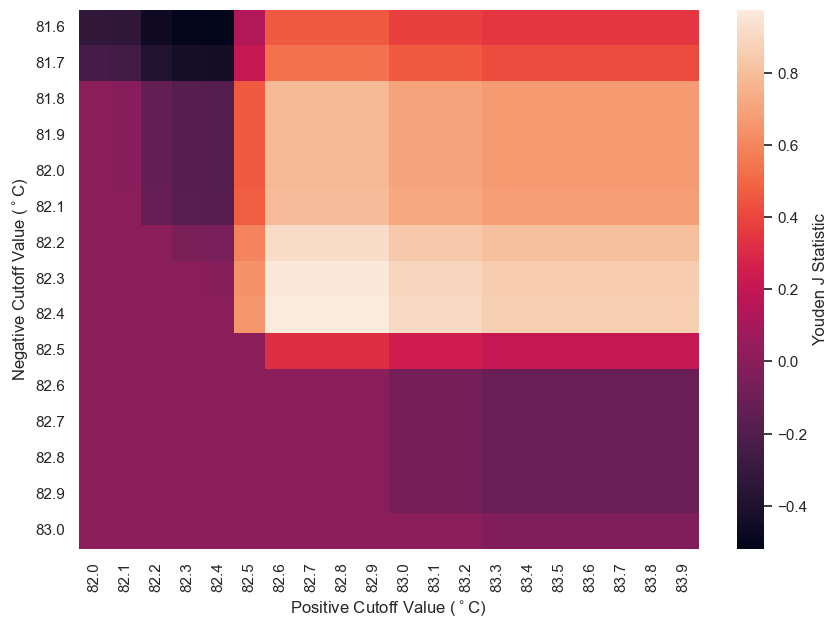

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Load data from the Excel file
def load_data(file_path, sheet):
    try:
        df = pd.read_excel(file_path, sheet)
        return df
    except Exception as e:
        print("Error loading data:", str(e))
        return None

# Calculate sensitivity and specificity for given cutoff
def calculate_metrics(df, cutoff, cutoff_pos):
    #df['Predicted_Label'] = np.where((df['Tm'] >= cutoff), 1, 0)
    df['Predicted_Label'] = np.where((df['Tm'] >= cutoff) & (df['Tm'] <= cutoff_pos), 1, 0)
    true_positives = df[(df['Label'] == 1) & (df['Predicted_Label'] == 1)].shape[0]
    true_negatives = df[(df['Label'] == 0) & (df['Predicted_Label'] == 0)].shape[0]
    false_positives = df[(df['Label'] == 0) & (df['Predicted_Label'] == 1)].shape[0]
    false_negatives = df[(df['Label'] == 1) & (df['Predicted_Label'] == 0)].shape[0]
    
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    
    return sensitivity, specificity

# Main function to perform ROC analysis
def melt_performance_analysis(file_path, sheet_name):
    df = load_data(file_path, sheet_name)
    if df is None:
        return
    
    
    # Calculate sensitivity and specificity for different cutoff values
    cutoff_values = np.arange(83, 81.5, -0.1)
    cutoff_pos_values = np.arange(82, 84, 0.1)
    sensitivity_values = []
    specificity_values = []
    idx = 0
    analysis_df = pd.DataFrame(columns = ['Negative_Cutoff', 'Positive_Cutoff', 'Sensitivity', 'Specificity', 'Youden_J'])
    for cutoff in cutoff_values:
        for cutoff_pos in cutoff_pos_values:
            sensitivity, specificity = calculate_metrics(df, cutoff, cutoff_pos)  
            #sensitivity, specificity = calculate_metrics(df, cutoff)
            sensitivity_values.append(sensitivity)
            specificity_values.append(specificity)
            idx += 1
            analysis_df.loc[idx, 'Negative_Cutoff'] = cutoff
            analysis_df.loc[idx, 'Positive_Cutoff'] = cutoff_pos
            analysis_df.loc[idx, 'Sensitivity'] = sensitivity
            analysis_df.loc[idx, 'Specificity'] = specificity
            analysis_df.loc[idx, 'Youden_J'] = sensitivity + specificity - 1
    
    analysis_df['Youden_J'] = pd.to_numeric(analysis_df['Youden_J'], errors='coerce')
    youden_df = analysis_df.pivot(index="Negative_Cutoff", columns="Positive_Cutoff", values="Youden_J")
    
    plt.figure(figsize=(10, 7))
    sns.set(font='Arial')
    heatmap = sns.heatmap(youden_df)
    
    heatmap.set_xticklabels(['%.1f' % tick for tick in youden_df.columns])
    heatmap.set_yticklabels(['%.1f' % tick for tick in youden_df.index])
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_label('Youden J Statistic')
    plt.xlabel('Positive Cutoff Value ($^\circ$C)')
    plt.ylabel('Negative Cutoff Value ($^\circ$C)')
    
    
    neg_boolean_mask = (analysis_df['Negative_Cutoff'] >= 82.4 - 0.1) & (analysis_df['Negative_Cutoff'] <= 82.4 + 0.1)
    pos_boolean_mask = (analysis_df['Negative_Cutoff'] >= 82.8 - 0.1) & (analysis_df['Negative_Cutoff'] <= 82.8 + 0.1)

    # Apply the boolean mask to filter the DataFrame
    filtered_df = analysis_df[neg_boolean_mask]
    print(filtered_df)

# Example usage
if __name__ == "__main__":
    file_path = "LHRM and Standard HRM Master Data Set for Dalton.xlsx"  # Provide the path to your Excel file
    sheet_name = "HRM Tm df initial"
    melt_performance_analysis(file_path, sheet_name)

#### L-DNA HRM

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load data from the Excel file
def load_data(file_path, sheet):
    try:
        df = pd.read_excel(file_path, sheet)
        return df
    except Exception as e:
        print("Error loading data:", str(e))
        return None

# Calculate sensitivity and specificity for given cutoff
def calculate_metrics(df, cutoff, cutoff_pos):
    #df['Predicted_Label'] = np.where((df['tm difference'] >= cutoff), 1, 0)
    df['Predicted_Label'] = np.where((df['tm difference'] >= cutoff) & (df['tm difference'] <= cutoff_pos), 1, 0)
    true_positives = df[(df['Label'] == 1) & (df['Predicted_Label'] == 1)].shape[0]
    true_negatives = df[(df['Label'] == 0) & (df['Predicted_Label'] == 0)].shape[0]
    false_positives = df[(df['Label'] == 0) & (df['Predicted_Label'] == 1)].shape[0]
    false_negatives = df[(df['Label'] == 1) & (df['Predicted_Label'] == 0)].shape[0]
    
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    
    return sensitivity, specificity

# Main function to perform ROC analysis
def lmelt_performance_analysis(file_path, sheet_name):
    df = load_data(file_path, sheet_name)
    if df is None:
        return

    
    # Calculate sensitivity and specificity for different cutoff values
    cutoff_values = np.arange(0, -15.1, -0.1)
    cutoff_value_pos = np.arange(0, 25.1, 0.1)
    sensitivity_values = []
    specificity_values = []
    idx = 0
    analysis_df = pd.DataFrame(columns = ['Negative_Cutoff', 'Positive_Cutoff', 'Sensitivity', 'Specificity', 'Youden_J'])
    for cutoff in cutoff_values:
        for cutoff_pos in cutoff_value_pos:
            sensitivity, specificity = calculate_metrics(df, cutoff, cutoff_pos)
            sensitivity_values.append(sensitivity)
            specificity_values.append(specificity)
            idx += 1
            analysis_df.loc[idx, 'Negative_Cutoff'] = np.round(cutoff, decimals=1)
            analysis_df.loc[idx, 'Positive_Cutoff'] = np.round(cutoff_pos, decimals=1)
            analysis_df.loc[idx, 'Sensitivity'] = sensitivity
            analysis_df.loc[idx, 'Specificity'] = specificity
            analysis_df.loc[idx, 'Youden_J'] = sensitivity + specificity - 1

    analysis_df['Youden_J'] = pd.to_numeric(analysis_df['Youden_J'], errors='coerce')
    youden_df = analysis_df.pivot(index="Negative_Cutoff", columns="Positive_Cutoff", values="Youden_J")
    
    

    plt.figure(figsize=(10, 7))
    sns.set(font='Arial')
    heatmap = sns.heatmap(youden_df)

    colorbar = heatmap.collections[0].colorbar
    colorbar.set_label('Youden J Statistic')
    plt.xlabel('Positive Cutoff Value (sec)')
    plt.ylabel('Negative Cutoff Value (sec)')
    
    neg_boolean_mask = (analysis_df['Negative_Cutoff'] >= -7 - 0.1) & (analysis_df['Negative_Cutoff'] <= -7 + 0.1)

    # # Apply the boolean mask to filter the DataFrame
    filtered_df = analysis_df[neg_boolean_mask]
    print(filtered_df)

    
    

# Example usage
if __name__ == "__main__":
    file_path = "LHRM and Standard HRM Master Data Set for Dalton.xlsx"  # Provide the path to your Excel file
    sheet_name = "LHRM tm df initial"
    lmelt_performance_analysis(file_path, sheet_name)